# Aprendizado de Máquina
__UFRJ-Macaé__

__Profa. Janaína Gomide__

## Reconhecendo Dígitos

Primeiro precisamos importar as bibliotecas que iremos utilizar:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import seaborn as sns

from matplotlib.image import imread 
from PIL import Image

from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import KFold, train_test_split
from sklearn import cluster

In [10]:
def jupyter_settings():
    %matplotlib inline

    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24

    display(HTML('<style>.conteiner{width:100% !important;}</style>'))

    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    # configura o pandas para quantidade de casas decimeis
    pd.set_option('display.float_format', lambda x: '%.2f' % x)

    sns.set()
jupyter_settings()

### 1 - Coletar os dados

In [3]:
conjuntoDados = pd.read_csv('letter_data.csv')
conjuntoDados.drop(columns='Unnamed: 0', inplace=True)
conjuntoDados.label = conjuntoDados.label.astype(str)
conjuntoDados.sample(5)

/tmp/ipykernel_121121/2821797933.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  conjuntoDados = pd.read_csv('letter_data.csv')


,label,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
3100,u,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2840,p,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3235,w,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2470,i,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
866,F,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


### 2 - Explorar os dados

Vamos explorar algumas coisas no conjunto de dados:

1. Quantos exemplos o conjunto de dados possui?

In [71]:
#1. Quantos exemplos possui
num_exemplo = conjuntoDados['label'].count()
print(f'No conjunto de dados existem {num_exemplo} exemplos')


No conjunto de dados existem 3410 exemplos


2. Quantos exemplos cada classe possui?

In [72]:
num_classes = len(conjuntoDados.label.unique())
print(f'Existem {num_classes} classes distintas')

Existem 62 classes distintas


In [73]:
#2. Quantos exemplos cada classe possui
num_exemplo = int(conjuntoDados.label.value_counts().unique())
print(f'Cada classe possui {num_exemplo} exemplos')

Cada classe possui 55 exemplos


3. Quais são os dígitos que estamos tentando reconhecer?

In [74]:
print('Os dígitos são:')
print(conjuntoDados.label.unique())

Os dígitos são:
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z'
 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


Vamos olhar um exemplo de cada dígito:

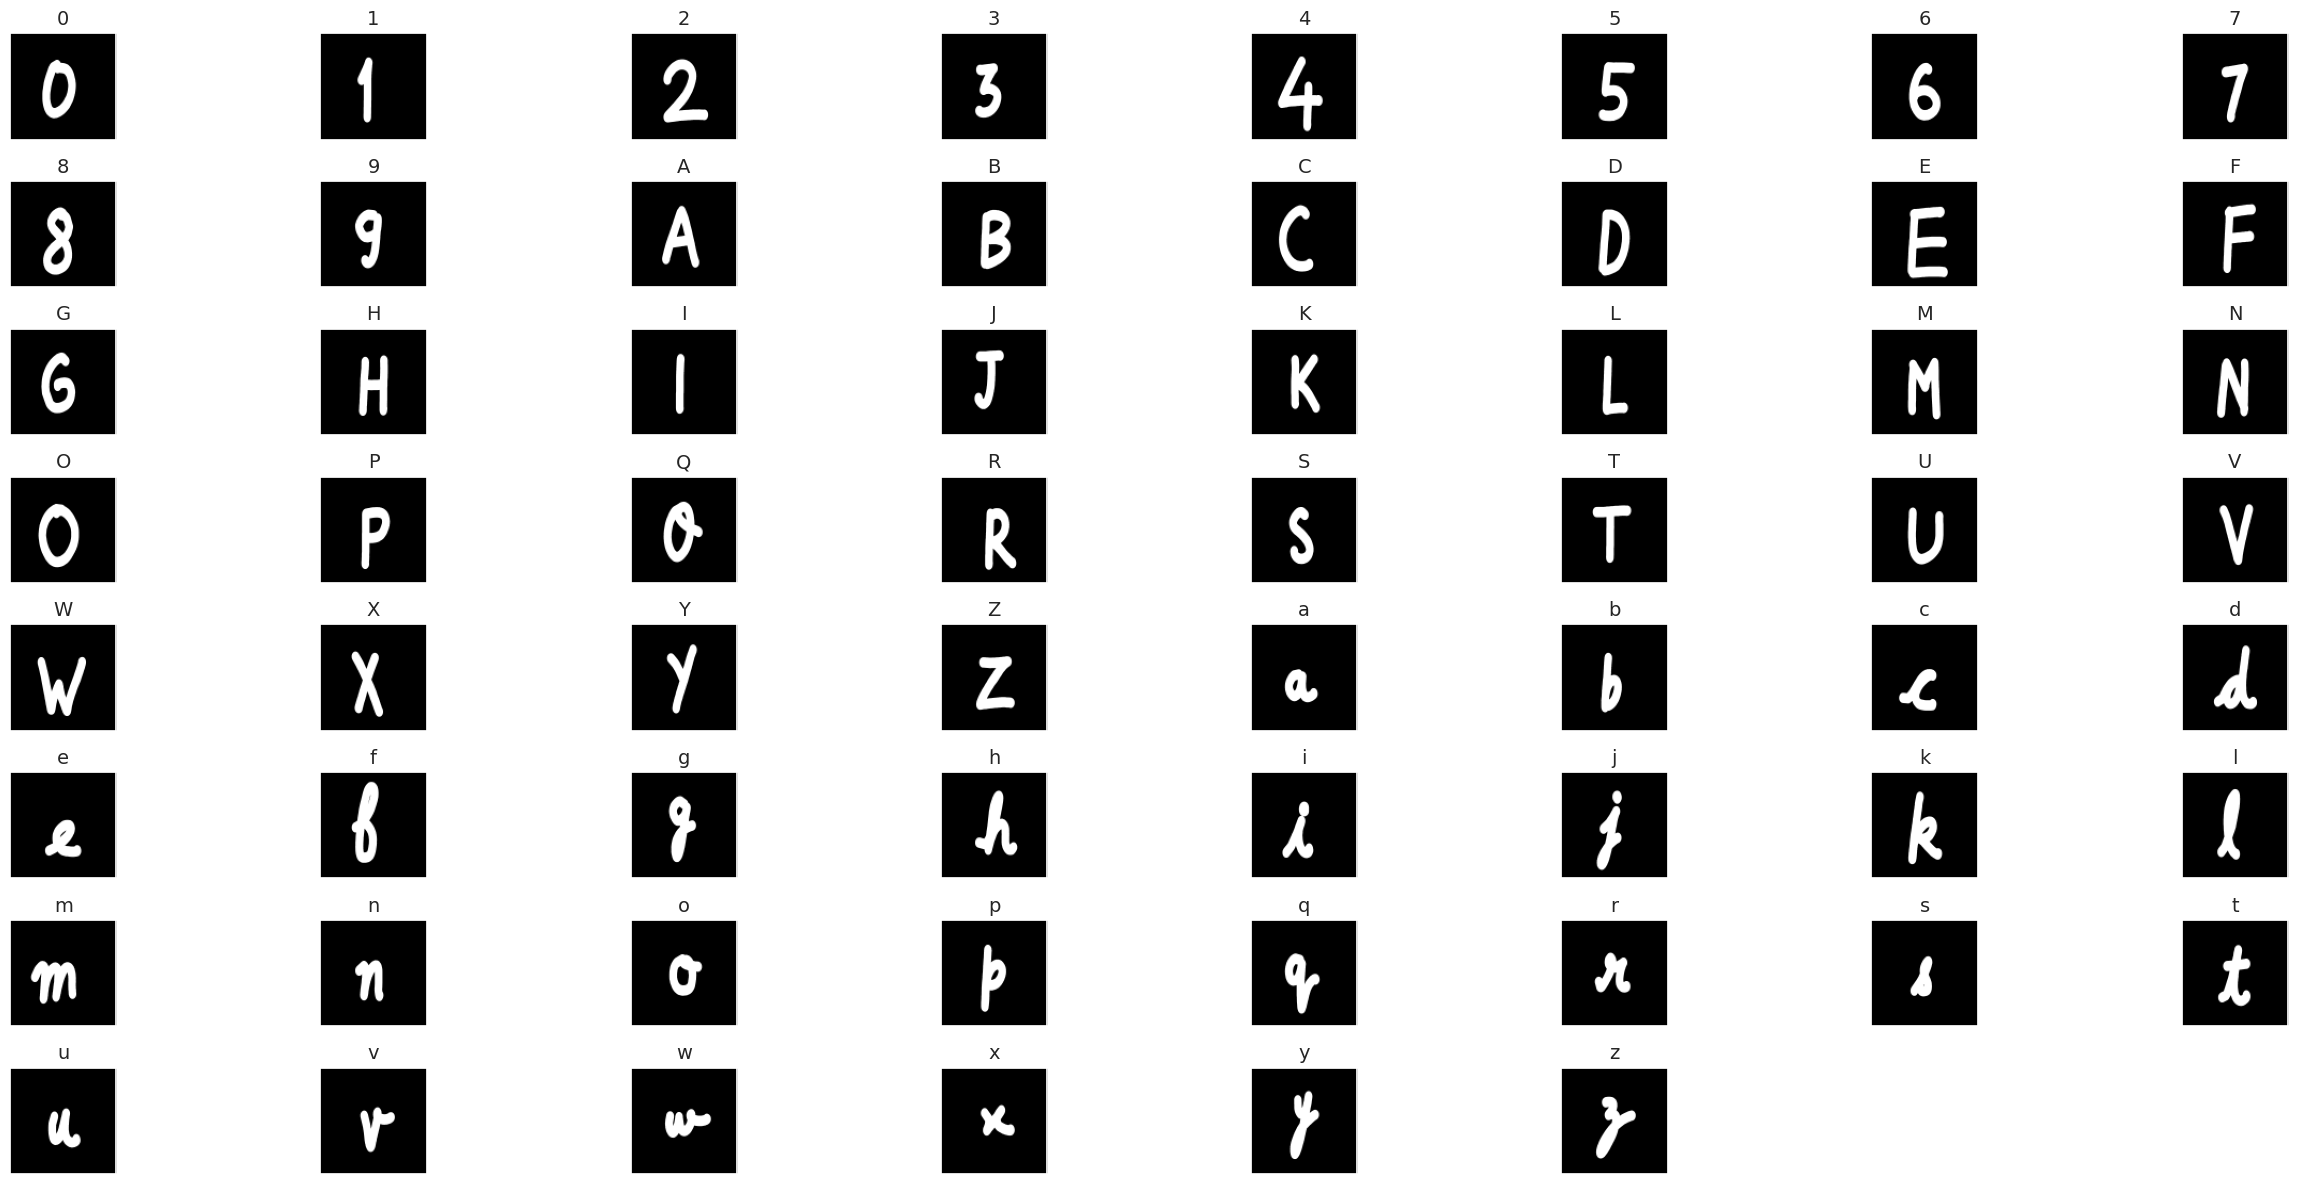

In [75]:
classes = [i for i in conjuntoDados['label'].unique()]
for i, classe in enumerate(classes):
    img_data = conjuntoDados[conjuntoDados['label'] == classe].iloc[1,1:]
    plt.subplot(8, 8, 1 + i)
    plt.imshow(np.array(img_data.to_list()).reshape(100,100), cmap=plt.cm.binary)
    plt.title(classe, fontsize=14)
    ax= plt.gca()
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
plt.tight_layout()
plt.show()

### 3 - Construir/Escolher Modelo

Vamos usar o classificador *Support Vector Classifier* (SVC) e fazer separação linear

In [4]:
classificador = svm.SVC(kernel='linear')

### 4 - Treinar o Modelo

Primeiro vamos separar o conjunto de dados em dois: **80%** dos dados serão utilizados para o **treino** e **20%** para o **teste**

In [5]:
training_data, testing_data = train_test_split(conjuntoDados, test_size=0.2, random_state=25)

#Separar conjunto de treino e conjunto de teste
treinoFeatures,treinoClasses = training_data.drop(columns='label'), training_data['label']
testeFeatures,testeClasses = testing_data.drop(columns='label'), testing_data['label']

Agora iremos treinar o classificador com os dados de treino

In [6]:
#Treina o classificador com os dados de treino
classificador.fit(treinoFeatures.values,treinoClasses.values)

SVC(kernel='linear')

### 5 - Testar e avaliar os resultados

In [7]:
#Usa o modelo criado para fazer a predição das classes para exemplos de teste
testePrevisao = classificador.predict(testeFeatures.values)

<AxesSubplot:>

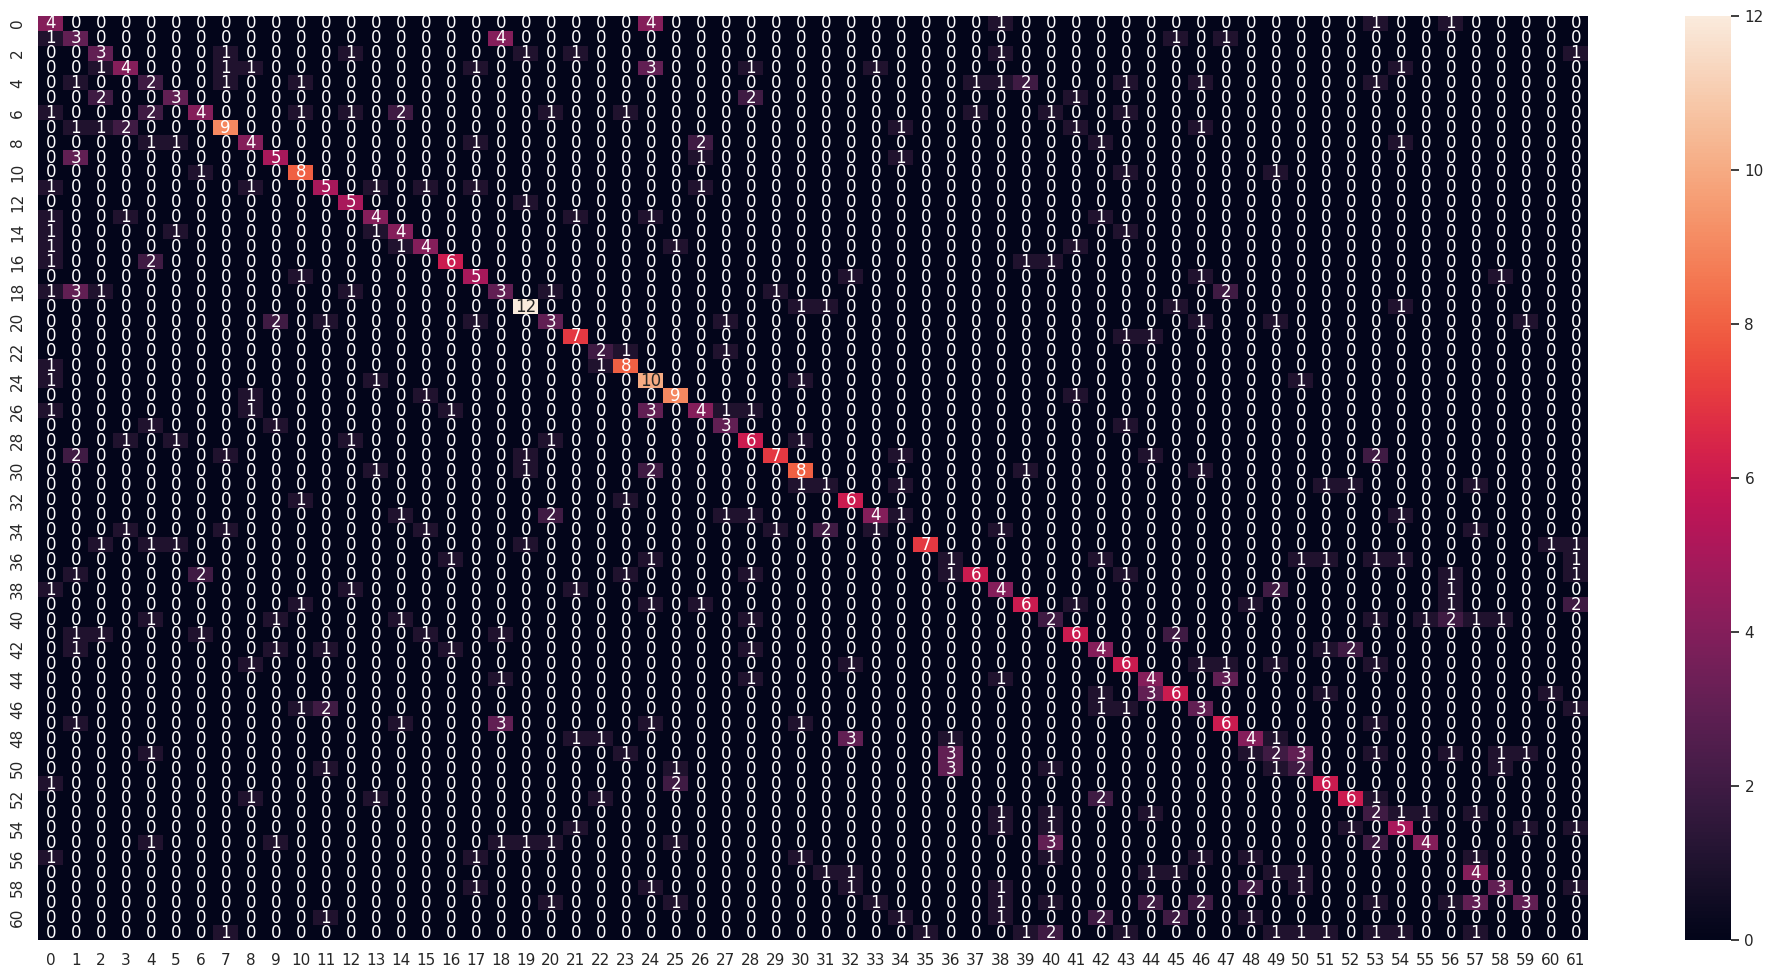

In [11]:
#Observa o resultado gerado pelo classificador
matrizConfusao = metrics.confusion_matrix(testeClasses,testePrevisao)
sns.heatmap(matrizConfusao, annot=True)

In [9]:
#Relatório de métricas
metricas = metrics.classification_report(testeClasses,testePrevisao)
print(metricas)

              precision    recall  f1-score   support

           0       0.22      0.36      0.28        11
           1       0.18      0.30      0.22        10
           2       0.30      0.33      0.32         9
           3       0.44      0.29      0.35        14
           4       0.17      0.17      0.17        12
           5       0.43      0.38      0.40         8
           6       0.50      0.25      0.33        16
           7       0.60      0.56      0.58        16
           8       0.40      0.36      0.38        11
           9       0.45      0.50      0.48        10
           A       0.57      0.73      0.64        11
           B       0.45      0.45      0.45        11
           C       0.50      0.83      0.62         6
           D       0.44      0.44      0.44         9
           E       0.40      0.50      0.44         8
           F       0.50      0.50      0.50         8
           G       0.67      0.55      0.60        11
           H       0.45    

### Experimento 2 - K-Means Clustering (Não Supervisionado)

In [82]:
estimador = cluster.KMeans(n_clusters=62)

treinoFeatures = conjuntoDados.iloc[:,1:]
clusters = estimador.fit_predict(treinoFeatures)
estimador.cluster_centers_.shape

(62, 10000)

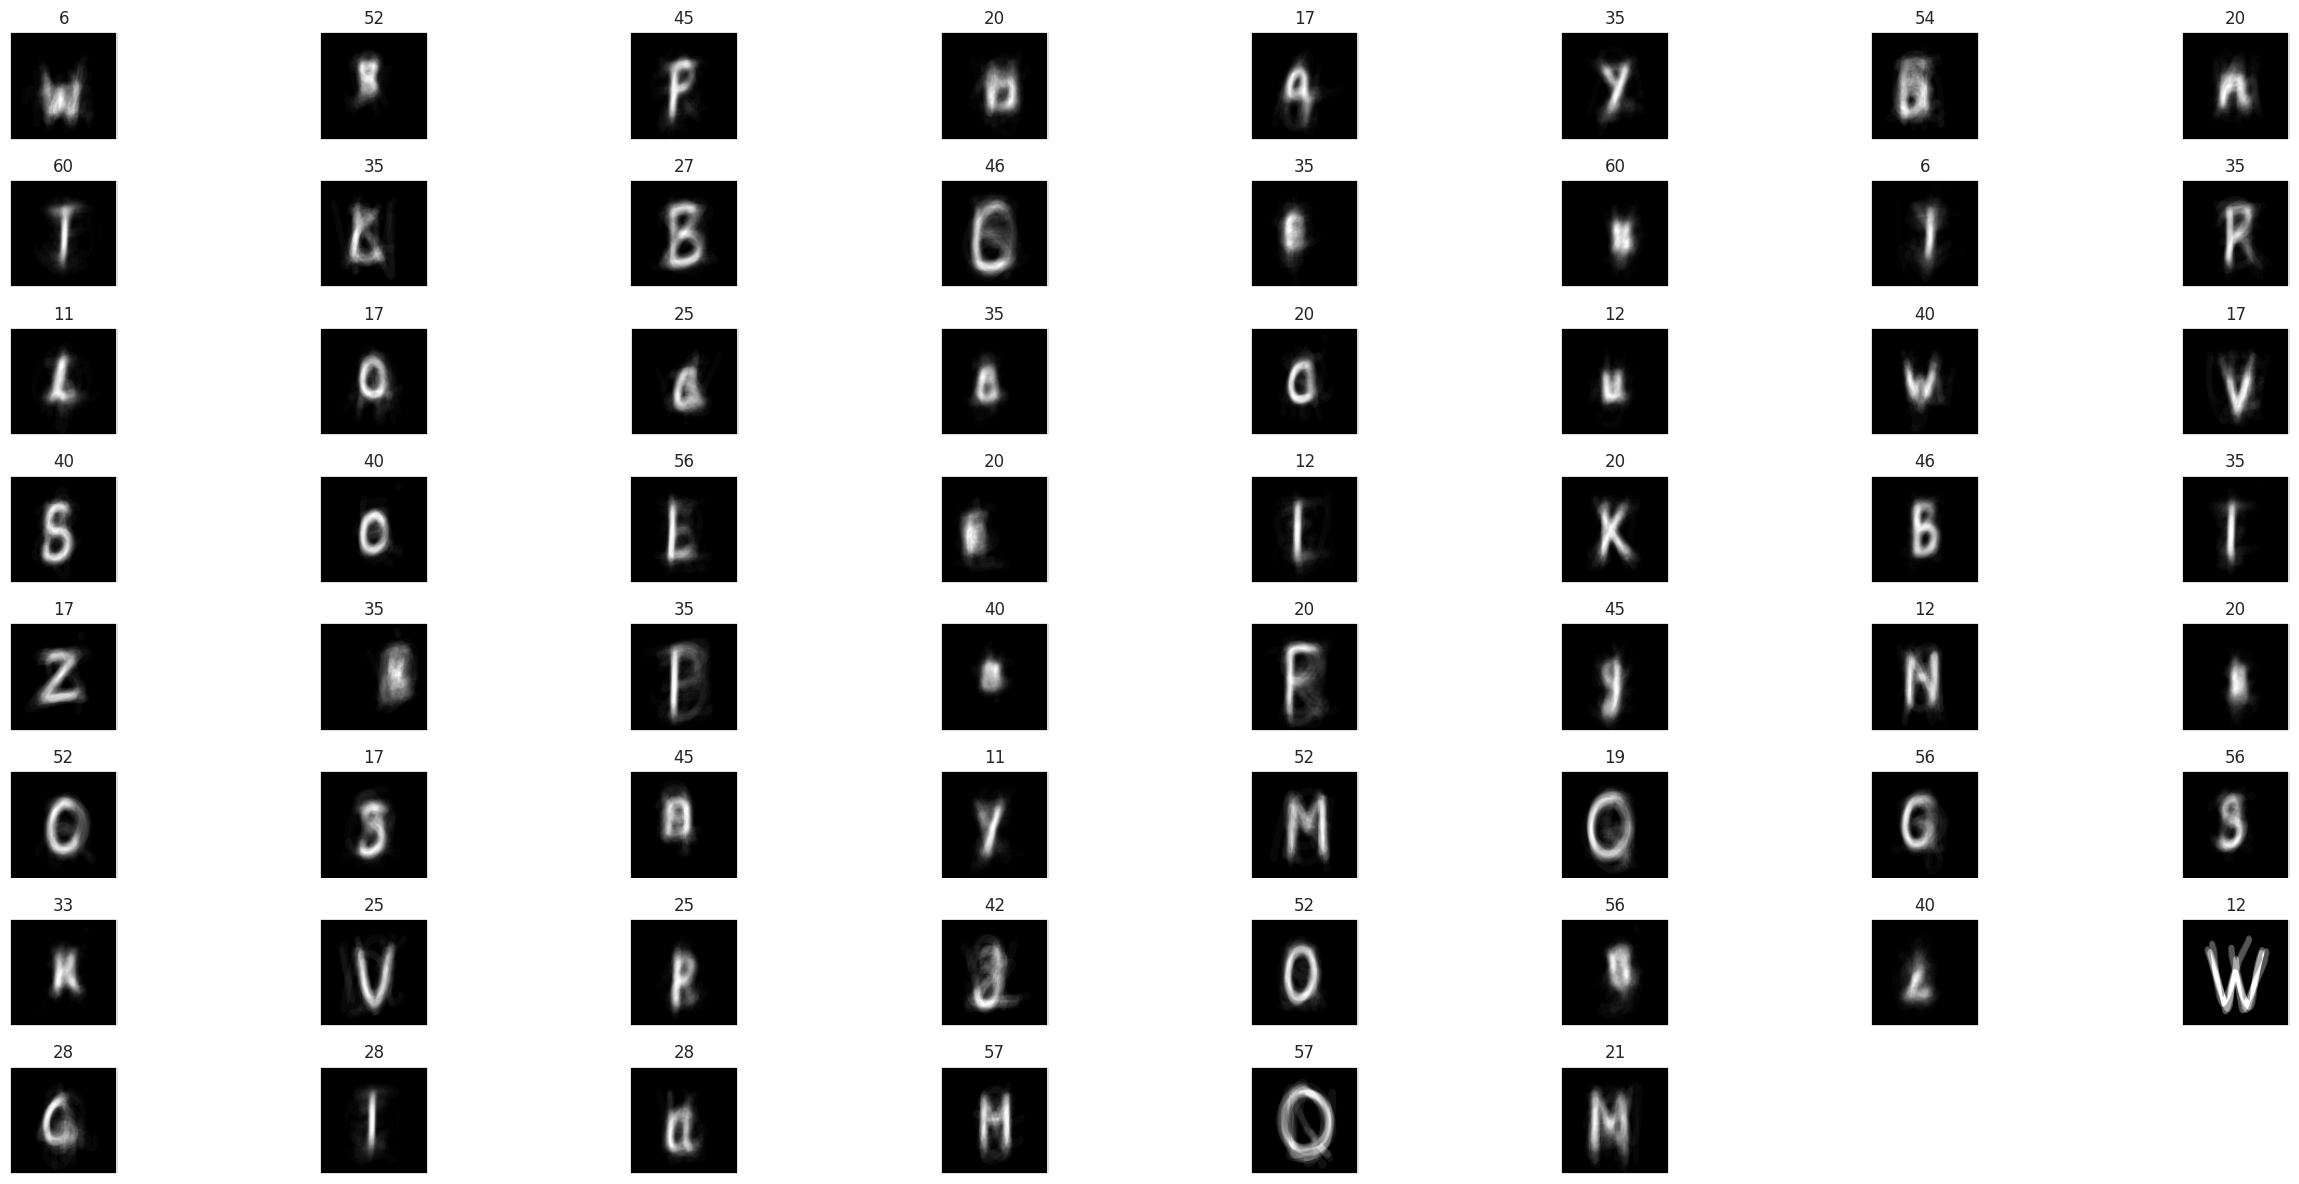

In [83]:
for i in range(num_classes):
    plt.subplot(8, 8, 1 + i)
    plt.imshow(estimador.cluster_centers_[i].reshape((100,100)), cmap=plt.cm.binary)
    plt.title(estimador.labels_[i])
    ax= plt.gca()
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
plt.tight_layout()
plt.show()

Avaliando o desempenho da terefa de classificação não-supervisionada através da métrica silhouette score:

In [84]:
silhouette = metrics.silhouette_score(treinoFeatures, estimador.labels_)
silhouette

0.013870706663678201

/home/pedro/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


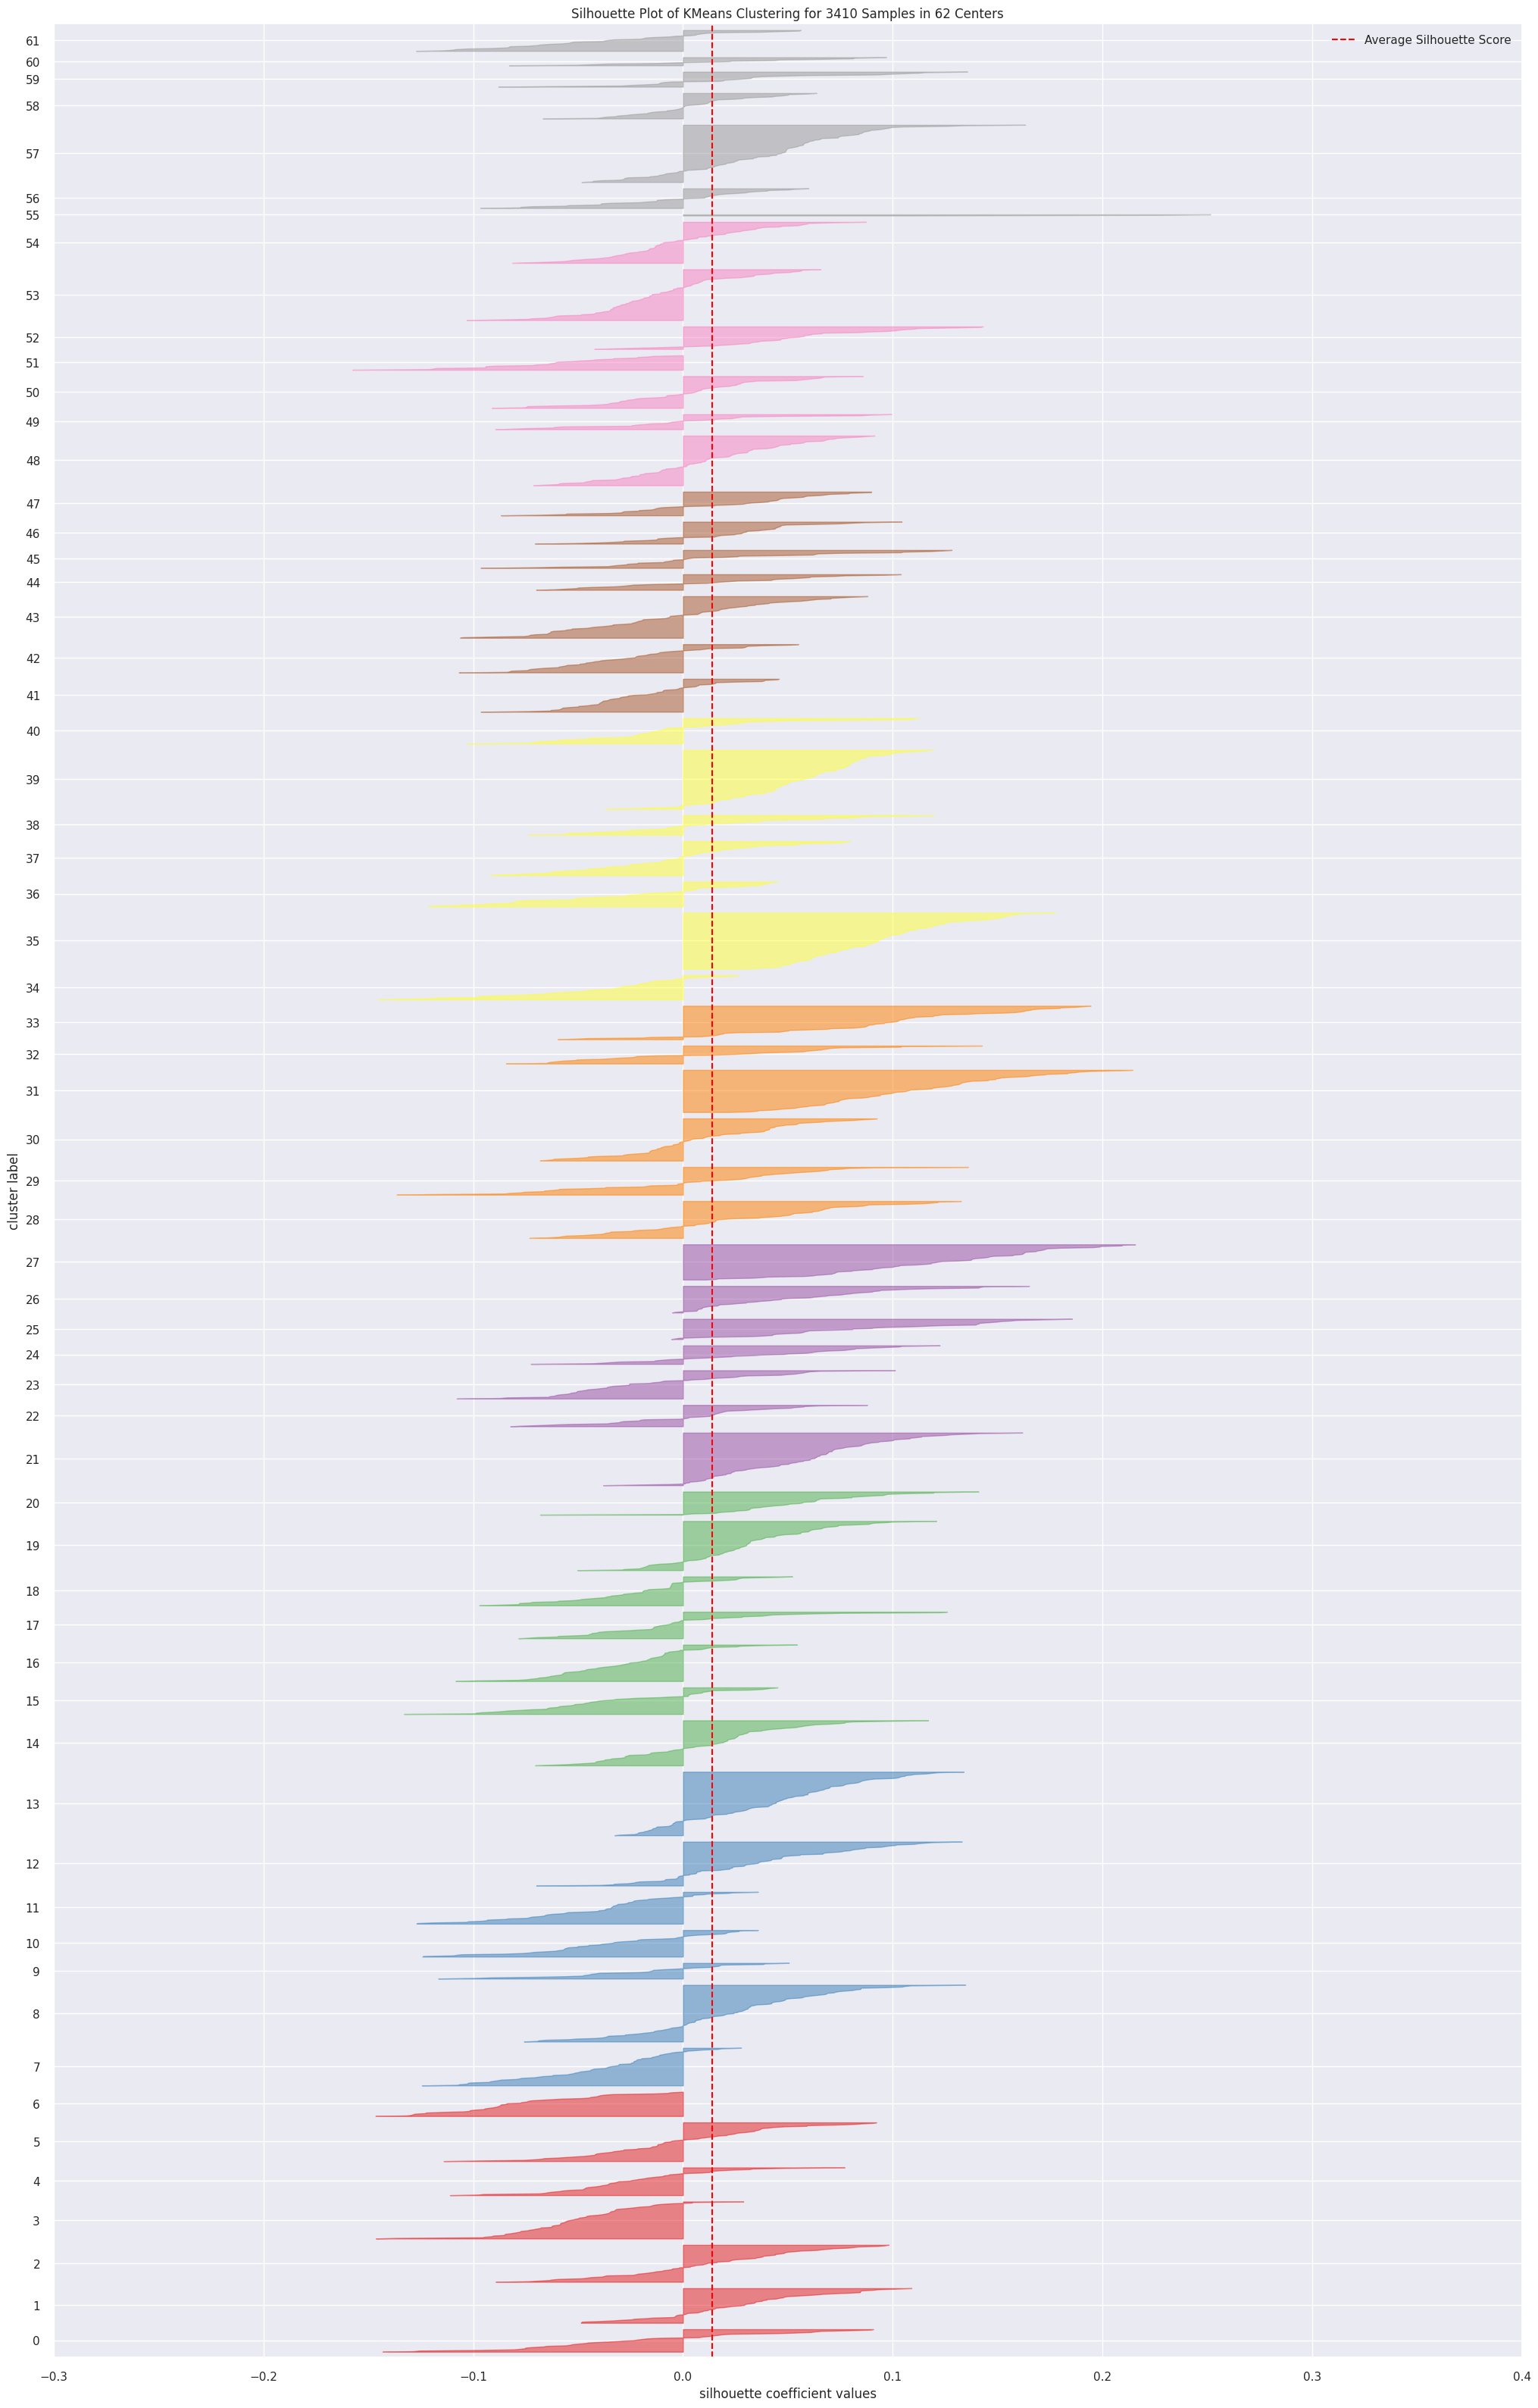

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3410 Samples in 62 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [85]:
from yellowbrick.cluster import SilhouetteVisualizer
fig = plt.figure(figsize=(25,40))
visualizer = SilhouetteVisualizer(estimador,ax=fig.gca())
visualizer.fit(treinoFeatures)
visualizer.show()

## 6 - Classificar novas instâncias

In [23]:
from PIL import ImageTk, Image, ImageDraw, ImageOps
import PIL
from tkinter import *
import tkinter as tk

In [29]:
width = 100 # canvas width
height = 100 # canvas height
center = height//2
white = (255, 255, 255) # canvas back

LARGE_FONT= ("Verdana", 12)
NORM_FONT= ("Verdana", 10)
SMALL_FONT= ("Verdana", 8)

def classify():
    image = output_image
    grey_image = ImageOps.grayscale(image)
    a_image = np.array(grey_image).flatten()
    prediction = classificador.predict([a_image])
    response = f'Dígito identificado: {prediction}'
    popupmsg(response)

def new_drawing():
    canvas.delete('all')

def popupmsg(msg):
    popup = tk.Tk()
    popup.wm_title("Voc digitou:")
    label = ttk.Label(popup, text=msg, font=NORM_FONT)
    label.pack(side="top", fill="x", pady=10)
    B1 = ttk.Button(popup, text="Okay", command = popup.destroy)
    B1.pack()
    popup.mainloop()

def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    canvas.create_oval(x1, y1, x2, y2, fill="black",width=5)
    draw.line([x1, y1, x2, y2],fill="black",width=5)

master = tk.Tk()

# create a tkinter canvas to draw on
canvas = Canvas(master, width=width, height=height, bg='white')
canvas.pack()

# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("RGB", (width, height), white)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)


# add a button to save the image
button=Button(text="classify",command=classify)
button.pack()

button2=Button(text="clear",command=new_drawing)
button2.pack()

master.mainloop()